In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000


# Create circles

x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# set random seed
tf.random.set_seed(42)


# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear'),
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit Model

model.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3846 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3819 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3802 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3789 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3780 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3772 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3764 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3662 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3636 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3620 - accuracy: 0.4860
Epoch 11/

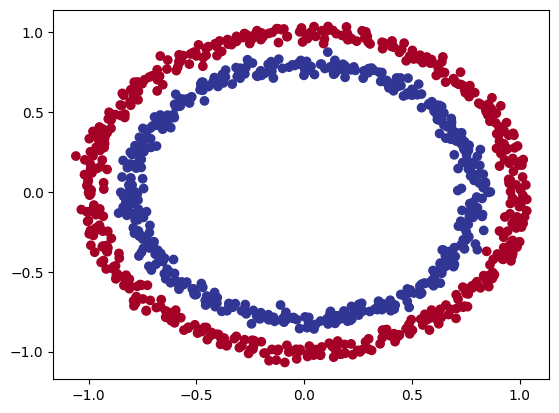

In [4]:
# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu) # 0 means get 0yh axis of X and 1 means first axis of X


In [5]:
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x
  """
  # define the axis boundries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1 # O means X-axis
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1 # 1 means Y-axis
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create x value (going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("Doing Multicalss Classification")
    # Have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('Doing Binary Classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing Binary Classification


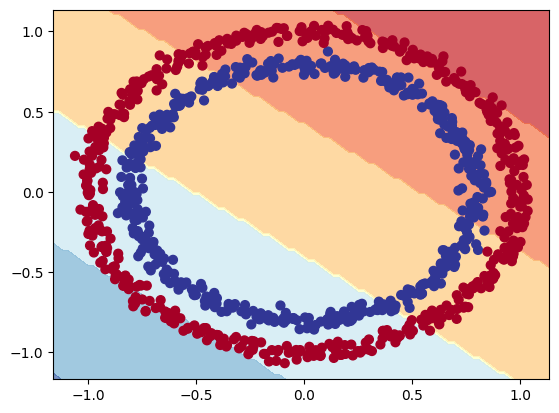

In [6]:
plot_decision_boundary(model, x, y)

Let's build first neural network with a non-linear activation function

In [7]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model with non-linear activation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu"),
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# 3. Fit Model
history = model_1.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.1534 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1400 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1251 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1240 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1229 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1059 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0931 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0705 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0613 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0390 - accuracy: 0.4820
Epoch 11/

Time to replicate the multi-layer neural network from TensorFlow playground in code.

In [8]:
# Set the random seed

tf.random.set_seed(42)

# 1. Create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

# 2. Compile model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history = model_2.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 5.0259 - accuracy: 0.2140
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7039 - accuracy: 0.1990
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.5868 - accuracy: 0.1890
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.3647 - accuracy: 0.1870
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 3.9969 - accuracy: 0.1840
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8767 - accuracy: 0.1680
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7742 - accuracy: 0.1070
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.4935 - accuracy: 0.2040
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 2.8639 - accuracy: 0.1940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6595 - accuracy: 0.2000
Epoch 11/

In [9]:
# Evaluate model

model_2.evaluate(x, y)

32/32 [==============================] - 1s 2ms/step - loss: 0.7665 - accuracy: 0.3130


[0.7665043473243713, 0.31299999356269836]

313/313 [==============================] - 1s 3ms/step
Doing Multicalss Classification


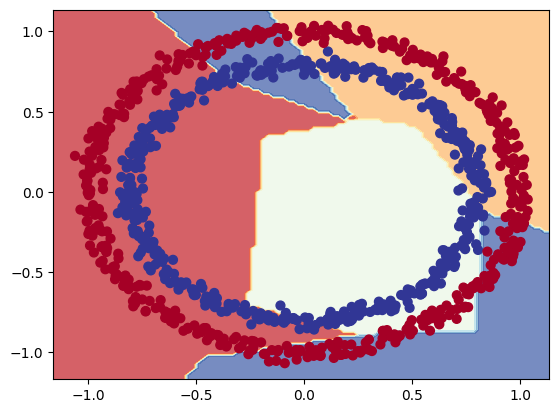

In [10]:
plot_decision_boundary(model_2, x, y)

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit Model
model_3.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7125 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4200
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4420
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4670
Epoch 11/

In [12]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.9490


[0.3789452314376831, 0.9490000009536743]

313/313 [==============================] - 0s 1ms/step
Doing Binary Classification


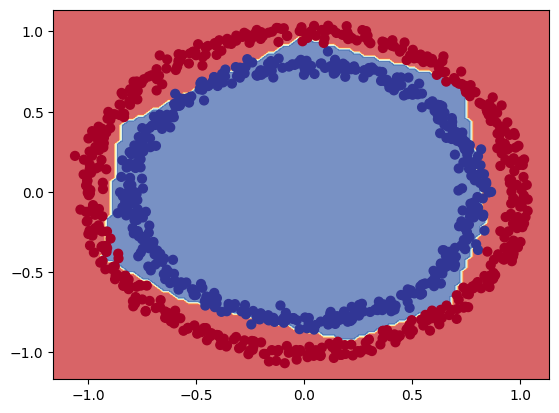

In [13]:
plot_decision_boundary(model_3, x, y)

#We have discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [14]:
# Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

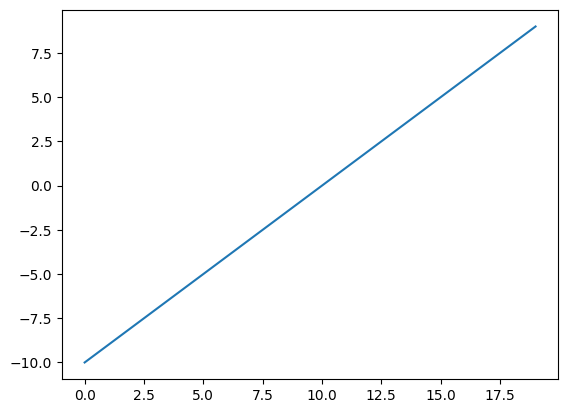

In [15]:
# VIsualize out toy tensor
plt.plot(A)

In [16]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

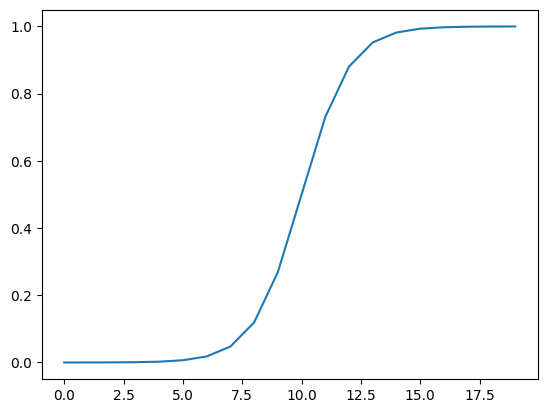

In [17]:
# Plot our toy tensor transformed by sigmoid

plt.plot(sigmoid(A))

In [18]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

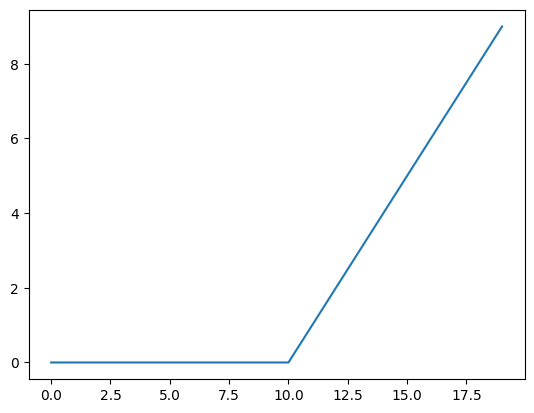

In [19]:
plt.plot(relu(A))

In [20]:
# activation Function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

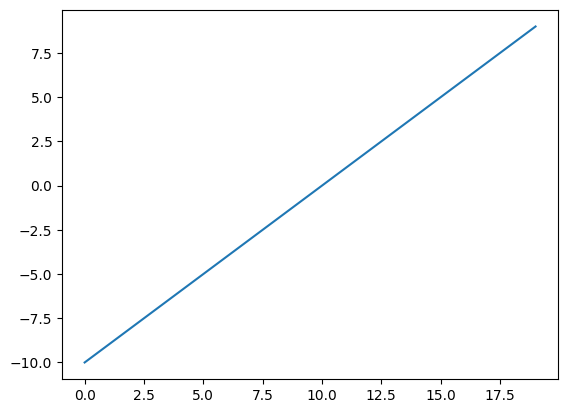

In [21]:
plt.plot(tf.keras.activations.linear(A))

In [22]:
# Does a even change?

A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#Evaluating and improving our classification
So far we've been training an testing on the same dataset
However, in machine learning this is basically a sin.
So let's create a training and test set.

In [23]:
# Check how many examples we have
len(x)

1000

In [24]:
x, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [25]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

In [26]:
# Let's recreate a model to fit on the training data and evaluate on the test

# Set the random
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_4.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5050
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5675
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5500
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6288
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.6288
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6112
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5976 - accuracy: 0.7387
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7437
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7962
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.8150
Epoch 11/25
25/25 [

In [27]:
# Evaluate the model on the test dataset
model_4.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1070 - accuracy: 0.9800


[0.10702858865261078, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
Doing Binary Classification
313/313 [==============================] - 0s 1ms/step
Doing Binary Classification


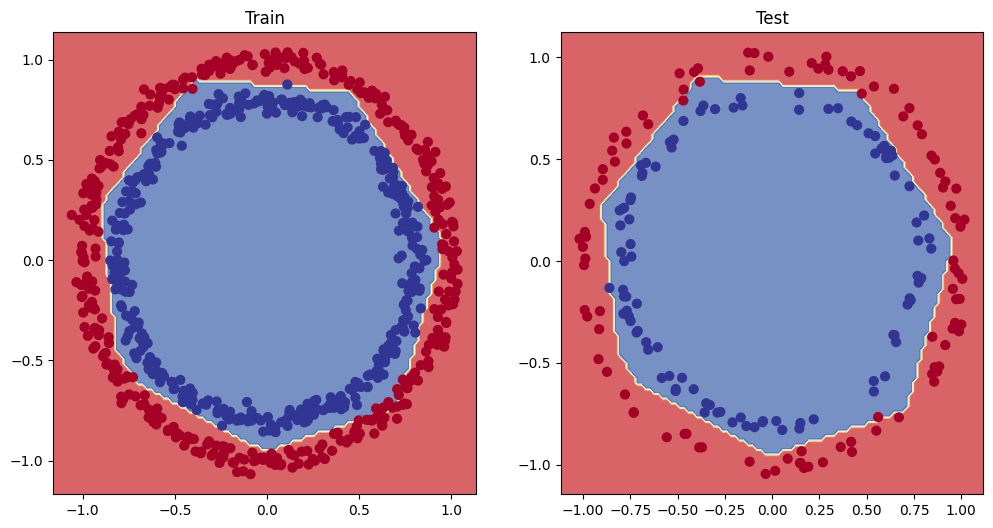

In [28]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) # 1 means 1 rows, 2 means 2 columns, 1 means first value
plt.title("Train")
plot_decision_boundary(model_4, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, x_test, y_test)
plt.show()

In [29]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 12        
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Plot the loss (or training) curves

In [30]:
history.history

{'loss': [0.6916806697845459,
  0.6870741844177246,
  0.6795735359191895,
  0.666943371295929,
  0.6529334187507629,
  0.6267892122268677,
  0.5976081490516663,
  0.5719161033630371,
  0.5262642502784729,
  0.49043357372283936,
  0.4547317624092102,
  0.4267158508300781,
  0.40756338834762573,
  0.3808148503303528,
  0.3584102392196655,
  0.3103524148464203,
  0.22829203307628632,
  0.20088252425193787,
  0.17954613268375397,
  0.16060666739940643,
  0.14493109285831451,
  0.12874218821525574,
  0.11993832886219025,
  0.12010493129491806,
  0.11091454327106476],
 'accuracy': [0.5049999952316284,
  0.5674999952316284,
  0.550000011920929,
  0.6287500262260437,
  0.6287500262260437,
  0.6112499833106995,
  0.7387499809265137,
  0.7437499761581421,
  0.7962499856948853,
  0.8149999976158142,
  0.8412500023841858,
  0.8525000214576721,
  0.8687499761581421,
  0.8787500262260437,
  0.8912500143051147,
  0.9137499928474426,
  0.9787499904632568,
  0.987500011920929,
  0.987500011920929,
  0.

In [31]:
# Convert the history into dataframe

import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy
0,0.691681,0.50500
1,0.687074,0.56750
2,0.679574,0.55000
3,0.666943,0.62875
4,0.652933,0.62875
5,0.626789,0.61125
6,0.597608,0.73875
7,0.571916,0.74375
8,0.526264,0.79625
9,0.490434,0.81500


Text(0.5, 1.0, 'Loss Curves')

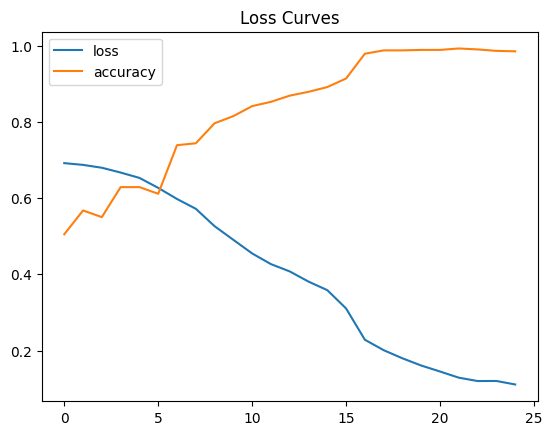

In [32]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Loss Curves")

🔑 **Note** The loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

#Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps.

* A learning rate **callback** - callback is an extra piece of functionality, can be added to our functionality *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [33]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_5.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)


# Cteate a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 100**(epoch/20))


# Fit the model (passing lr_scheduler callback)

history_5 = model_5.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7066 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.5013 - lr: 2.5119e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.5000 - lr: 3.1623e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.4888 - lr: 3.9811e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4437 - lr: 5.0119e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

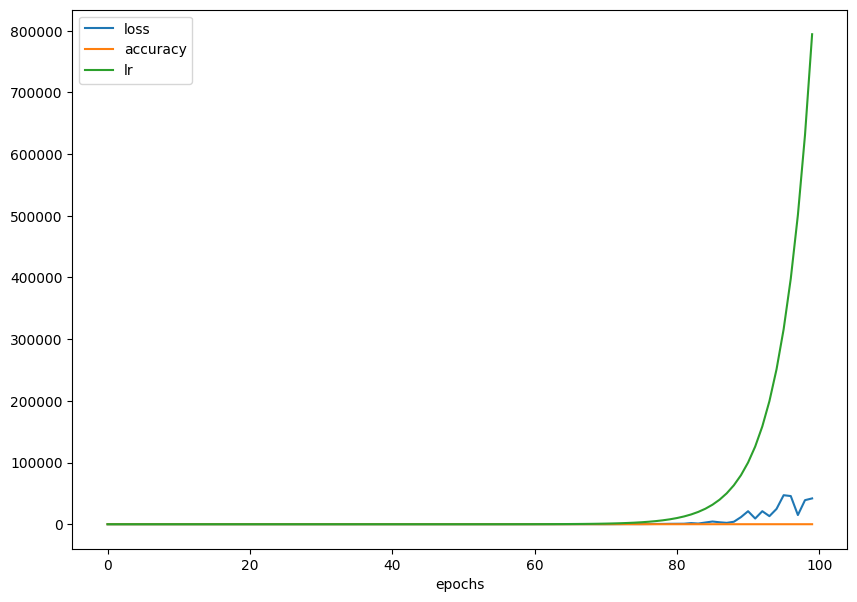

In [34]:
# Checkout the history

pd.DataFrame(history_5.history).plot(figsize=(10, 7), xlabel="epochs")

In [35]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [36]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs Loss')

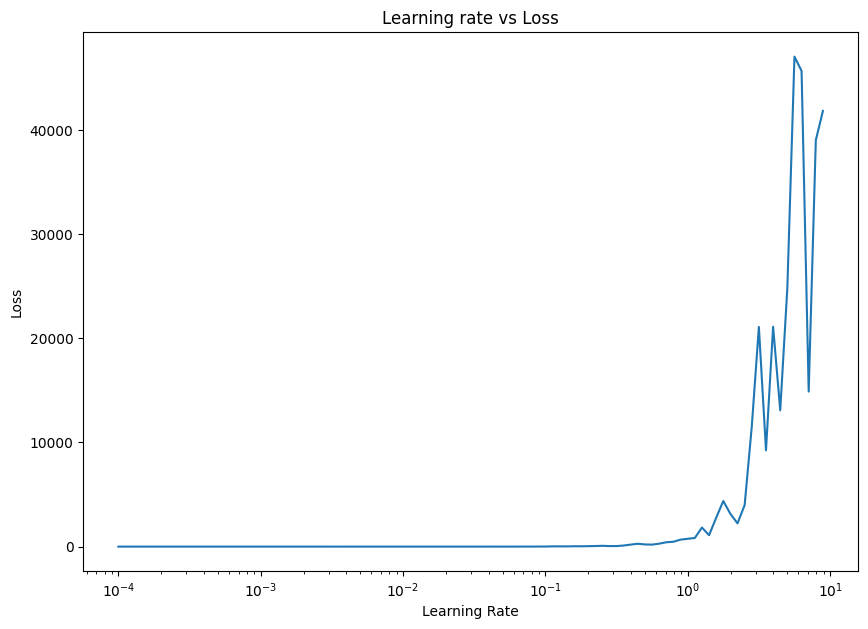

In [37]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_5.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [38]:
# Example of other typical learning rates values:

10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [39]:
# Let's try using a higher *ideal* learning rate with rhe same model

# set random seed
tf.random.set_seed(42)


# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with ideal learning rate
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

# Fit the model for  20 epochs (5 less than before)
history_6 = model_6.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.7009 - accuracy: 0.4812
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5437
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6000
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.6162
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6125
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6554 - accuracy: 0.6888
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6353 - accuracy: 0.6888
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6963
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7625
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.8112
Epoch 11/20
25/25 [

In [40]:
# Evaluate model 6
model_6.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8300


[0.4412652254104614, 0.8299999833106995]

In [41]:
# Evaluate model 5
model_5.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 51443.6016 - accuracy: 0.5050


[51443.6015625, 0.5049999952316284]

313/313 [==============================] - 0s 1ms/step
Doing Binary Classification
313/313 [==============================] - 0s 1ms/step
Doing Binary Classification


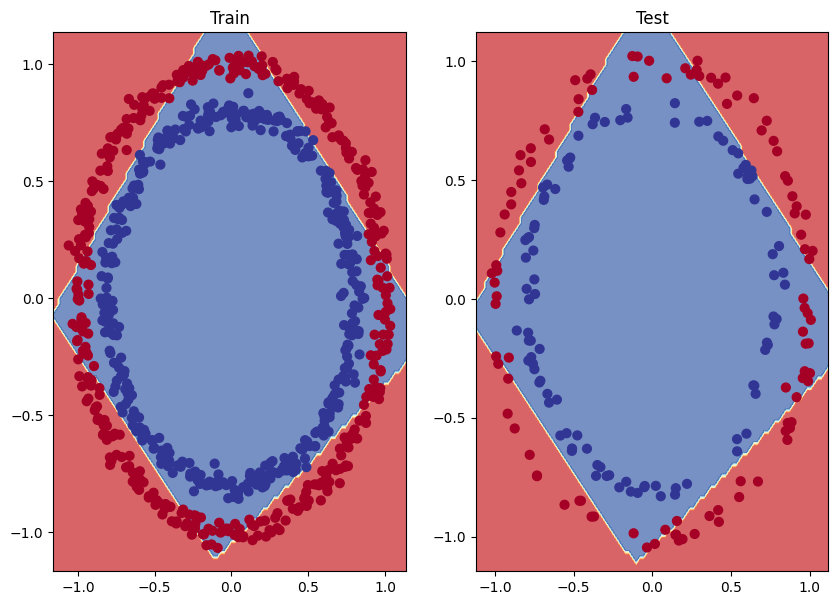

In [42]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, x_test, y_test)
plt.show()

#More classification evaluation methods

Alondside visualizing our models as much as possible, there are a handful of other classification evaluation methods and metrics we should familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)

In [43]:
# Check the accuracy of our model

loss, accuracy = model_6.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8300
Model loss on the test set: 0.4412652254104614
Model accuracy on the test set: 83.00%


#How about a confusion matrix?

In [44]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_6.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[67, 34],
       [ 0, 99]])

Looks like our predictions array has come out in **prediction probability** form... the standard output activation functions

In [45]:
y_preds

array([[0.6332876 ],
       [0.95787084],
       [0.7119295 ],
       [0.84598047],
       [0.30920902],
       [0.57934046],
       [0.6311102 ],
       [0.32947457],
       [0.8741066 ],
       [0.20497443],
       [0.6792899 ],
       [0.48486146],
       [0.9012262 ],
       [0.83121186],
       [0.9720441 ],
       [0.92945087],
       [0.72665834],
       [0.8634851 ],
       [0.3094556 ],
       [0.6324865 ],
       [0.5084559 ],
       [0.95707387],
       [0.68374544],
       [0.7353518 ],
       [0.29760805],
       [0.5399717 ],
       [0.8699048 ],
       [0.20581442],
       [0.23258561],
       [0.8840165 ],
       [0.17070478],
       [0.9662419 ],
       [0.9127665 ],
       [0.20922449],
       [0.848067  ],
       [0.9705661 ],
       [0.9617929 ],
       [0.63149995],
       [0.95331746],
       [0.9639447 ],
       [0.73690516],
       [0.755648  ],
       [0.7530148 ],
       [0.35296834],
       [0.92138046],
       [0.7730376 ],
       [0.63321614],
       [0.103

In [46]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [47]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[67, 34],
       [ 0, 99]])

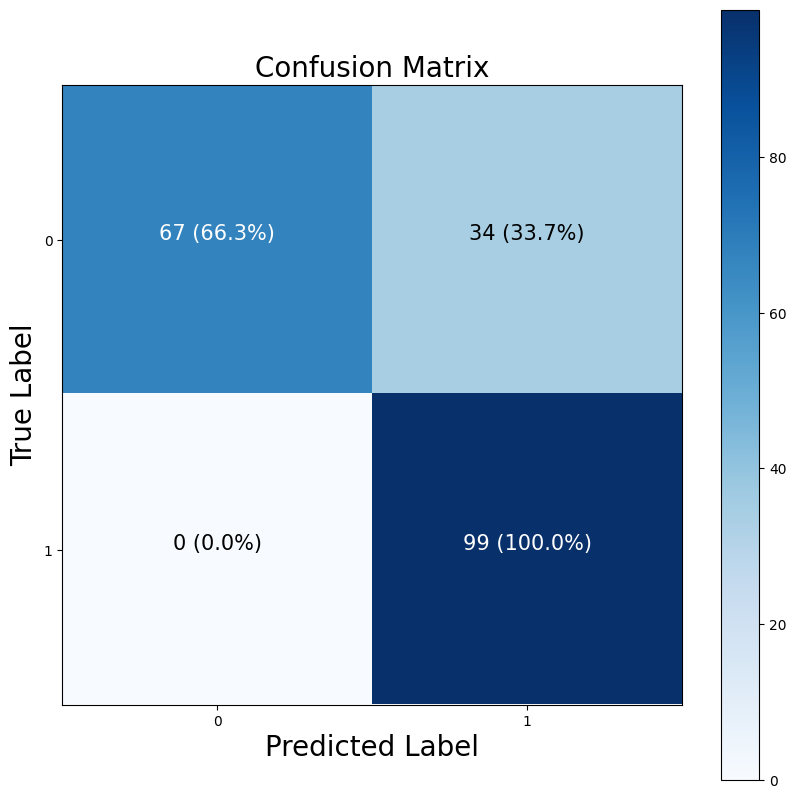

In [48]:
# Preetifying our confusion matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  label = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )


# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2


# plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15
           )

#Working with Larger Example (multiclass classification)

When we have more than two classes as option, it's known as **multi-class classification**.

To practice multi-class classification, we are going to build a neural network to classify different items of clothing.

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [50]:
# Show the first training example
print(f"Training sample\n {train_data[0]}\n")
print(f"Training label\n {train_labels[0]}\n")

Training sample
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [51]:
# Check the shape of single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

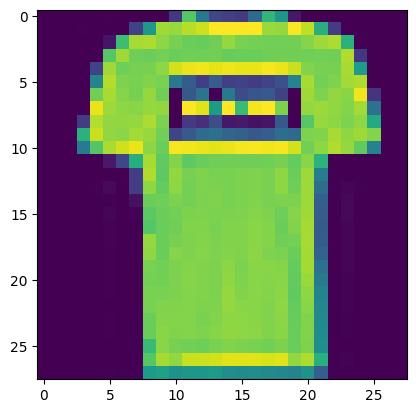

In [52]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.imshow(train_data[1])

In [53]:
# Check out sample labels
train_labels[7]

2

In [54]:
# Create a small list so we can index our training labels so they are human readable
class_names = ["T-shirt/tops", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag", "Ankleboot"]
len(class_names)

# Anything over 2 is labelled as multiclass classification

10

Text(0.5, 1.0, 'Bag')

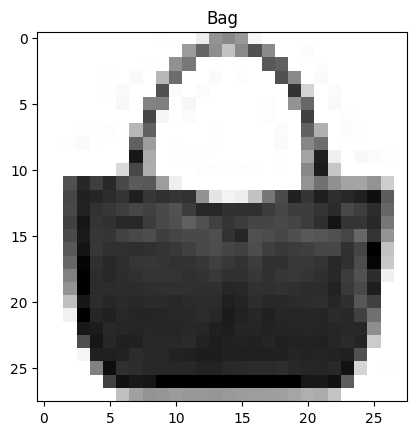

In [55]:
#Plot an example image and it's labels
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

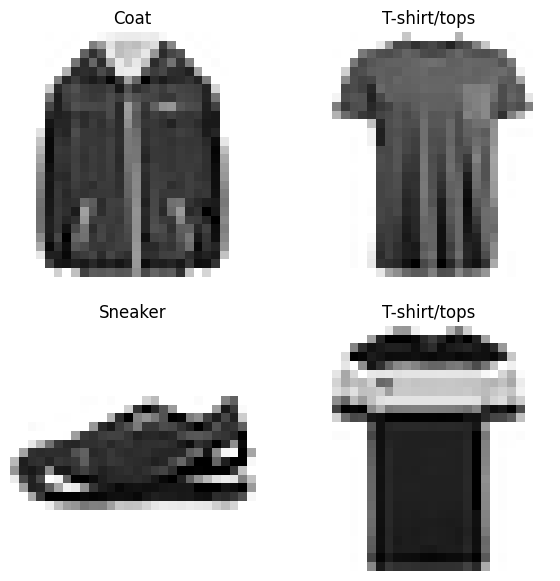

In [56]:
# Plot random images of fashion MNIST

import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1) # 2 rows, 2 columns, index = i + 1
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

#Building a multi-class classification model

For our multi-class classification model, we can use similar architecture to our binary classifiers, however we're going to tweak few things:
* Input shape: 28 * 28 (the shape of one image)
* Output shape: 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If labels are one_hot encoding use CategoricalCrossentropy().
  * If labels are integer form use SparseCategoricalCrossentropy().
* Output layer activation = Softmax (not sigmoid)

In [57]:
train_data[0].shape

(28, 28)

In [58]:
len(class_names)

10

In [59]:
# our data needs to be flattened (from 28 * 28 to None, 784)
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])
flatten_model.output_shape

# 28*28 =784

(None, 784)

In [60]:
# Set random seed
tf.random.set_seed(42)


# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input data needs to be flatten because of shape error.
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile the model
model_7.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
no_norm_history = model_7.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3535 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [61]:
# Check model summary
model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 4)                 3140      
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Check the min and max value of training data

train_data.min(), train_data.max()

(0, 255)

Neural networks prefers data to be scaled(or normalized), this means they like to have numbers between 0 and 1.

Right now our numbers are between 0 and 255. We can convert it into 0 and 1 by dividing it with 255.

In [63]:
# We can get our training and testing data between 0 and 1 by dividing it with maximum.

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max value of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [64]:
# Now our data is normalized, let's build a model to find patterns in it.


# set random seed
tf.random.set_seed(42)


# create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_8.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


# fit model
norm_history = model_8.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4128 - accuracy: 0.4903 - val_loss: 1.0444 - val_accuracy: 0.6551
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9426 - accuracy: 0.6790 - val_loss: 0.9227 - val_accuracy: 0.6739
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8627 - accuracy: 0.6958 - val_loss: 0.8749 - val_accuracy: 0.6997
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8265 - accuracy: 0.7015 - val_loss: 0.8428 - val_accuracy: 0.6903
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7891 - accuracy: 0.7078 - val_loss: 0.7961 - val_accuracy: 0.6992
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7503 - accuracy: 0.7099 - val_loss: 0.7931 - val_accuracy: 0.7002
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7282 - accuracy: 0.7179 - val_loss: 0.7726 - val_accuracy:

🔑 **Note** Neural Networks tend to prefer data in numerical form as well as normalized/scalar (between 0 & 1) form.

<Axes: title={'center': 'Normalised Data'}>

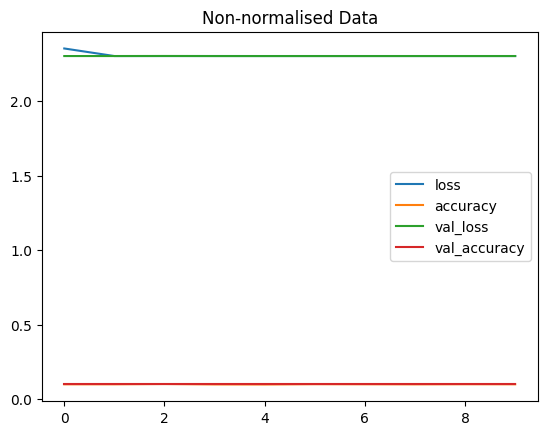

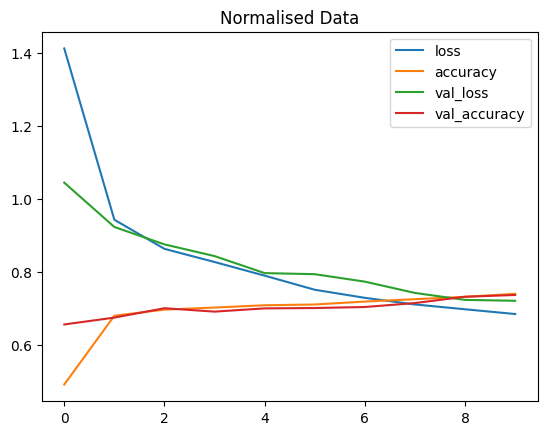

In [65]:
import pandas as pd

# Plot non normalised data loss curves
pd.DataFrame(no_norm_history.history).plot(title="Non-normalised Data")

# plot normalised data curve
pd.DataFrame(norm_history.history).plot(title="Normalised Data")

#Find ideal learning rate

In [66]:
# set random seed
tf.random.set_seed(42)

# create model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile model
model_9.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

#create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
find_lr_history = model_9.fit(train_data_norm, train_labels,epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3071 - accuracy: 0.5157 - val_loss: 0.8526 - val_accuracy: 0.7047 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7639 - accuracy: 0.7232 - val_loss: 0.7768 - val_accuracy: 0.7106 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6953 - accuracy: 0.7519 - val_loss: 0.7049 - val_accuracy: 0.7451 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6647 - accuracy: 0.7637 - val_loss: 0.6815 - val_accuracy: 0.7617 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6479 - accuracy: 0.7688 - val_loss: 0.6579 - val_accuracy: 0.7744 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6359 - accuracy: 0.7736 - val_loss: 0.6863 - val_accuracy: 0.7651 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

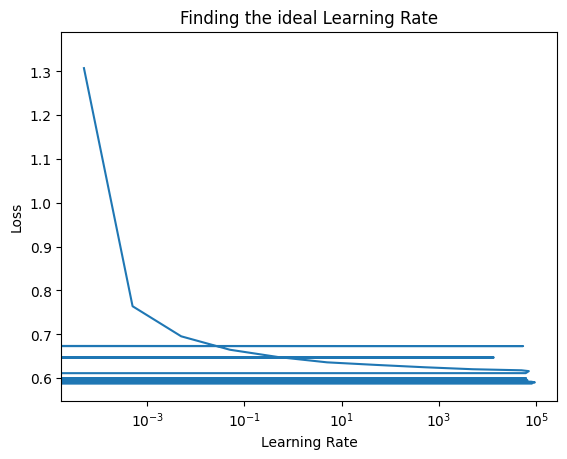

In [67]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt


lrs = 1e-3 * (10**tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"]) # we only want loss component from history
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning Rate")

In [68]:
# let's refit  amodel with ideal learning rate

# set random seed
tf.random.set_seed(42)

# create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile model
model_10.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

#create the learning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#fit the model
history_10 = model_10.fit(
    train_data_norm,
    train_labels,epochs=20,
    validation_data=(test_data_norm, test_labels),
    # callbacks=[lr_scheduler]
    )

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3585 - accuracy: 0.5037 - val_loss: 0.8718 - val_accuracy: 0.7030
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7638 - accuracy: 0.7375 - val_loss: 0.7404 - val_accuracy: 0.7458
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6854 - accuracy: 0.7605 - val_loss: 0.6971 - val_accuracy: 0.7577
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6530 - accuracy: 0.7710 - val_loss: 0.6750 - val_accuracy: 0.7651
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6368 - accuracy: 0.7768 - val_loss: 0.6764 - val_accuracy: 0.7658
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6230 - accuracy: 0.7804 - val_loss: 0.6980 - val_accuracy: 0.7586
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6166 - accuracy: 0.7817 - val_loss: 0.6591 - val_accuracy:

#Evaluating our multi-class classification model
* To evaluate our multi_class model we can create confusion matrix.
* Access some of predictions through visualization.
* Improve it's results(by training longer or changing its architecture).
* Save and export it to use in an application.


Let's go with top two...

In [81]:
# create confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_metrics(y_true, y_pred, classes=None, figsize = (10, 10), text_size=15):

# Create the confusion matrix

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  # set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )


  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2


  # plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
            )

In [70]:
# Make some predictions with our model
y_probs = model_10.predict(test_data_norm) #probs is short for prediction probabilities
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.54887400e-05, 1.95119610e-05, 1.77957281e-06, 7.32862391e-05,
        6.40815824e-06, 5.26697934e-01, 2.23265197e-05, 5.12272939e-02,
        1.47258659e-04, 4.21778679e-01],
       [2.22059080e-05, 3.34579258e-16, 9.26117659e-01, 3.20611520e-07,
        2.54606716e-02, 0.00000000e+00, 4.83962893e-02, 9.33115006e-37,
        2.81355028e-06, 0.00000000e+00],
       [3.13108554e-03, 9.90041137e-01, 9.80572167e-07, 6.79059280e-03,
        1.75006790e-07, 8.98414816e-31, 3.59359219e-05, 5.87950175e-11,
        4.53065580e-12, 4.51119144e-32],
       [5.42885100e-04, 9.89456356e-01, 1.38668170e-07, 9.99001414e-03,
        1.49908587e-07, 4.68042053e-26, 1.02093945e-05, 4.48889743e-08,
        3.44113973e-12, 1.89109791e-25],
       [1.39557838e-01, 6.24911627e-05, 2.71968156e-01, 2.25836206e-02,
        5.18433005e-02, 1.67065329e-20, 5.08007944e-01, 5.23464562e-12,
        5.97658986e-03, 5.97844268e-33]], dtype=float32)

In [71]:
test_data[0], test_data_norm[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

🔑 **Note** Remember to make predictions on same kind of data model was trained on (e.g if model was trained on normalised data predictions should be made on normalised data)

In [72]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.5488740e-05, 1.9511961e-05, 1.7795728e-06, 7.3286239e-05,
        6.4081582e-06, 5.2669793e-01, 2.2326520e-05, 5.1227294e-02,
        1.4725866e-04, 4.2177868e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [73]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# view first 10 predictions
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [74]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [75]:
# Make confusion metrics

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)


# in confusion mterics the diagonal must have the highest numbers

array([[785,   2,   9,  69,   5,   2,  94,   4,  30,   0],
       [ 18, 906,   0,  64,   1,   0,   6,   2,   3,   0],
       [ 37,   1, 528,  18, 195,   0, 201,   0,  20,   0],
       [ 39,  10,   4, 805,  47,   0,  80,   5,  10,   0],
       [  3,   0,  89,  40, 763,   0,  87,   0,  18,   0],
       [  1,   0,   0,   0,   0, 899,   0,  40,  11,  49],
       [177,   1, 133,  53, 221,   0, 355,   1,  59,   0],
       [  0,   0,   0,   1,   0,  56,   0, 907,   2,  34],
       [ 11,   0,   7,   6,   4,  12,  10,   7, 943,   0],
       [  0,   0,   0,   0,   0,  48,   0,  38,   1, 913]])

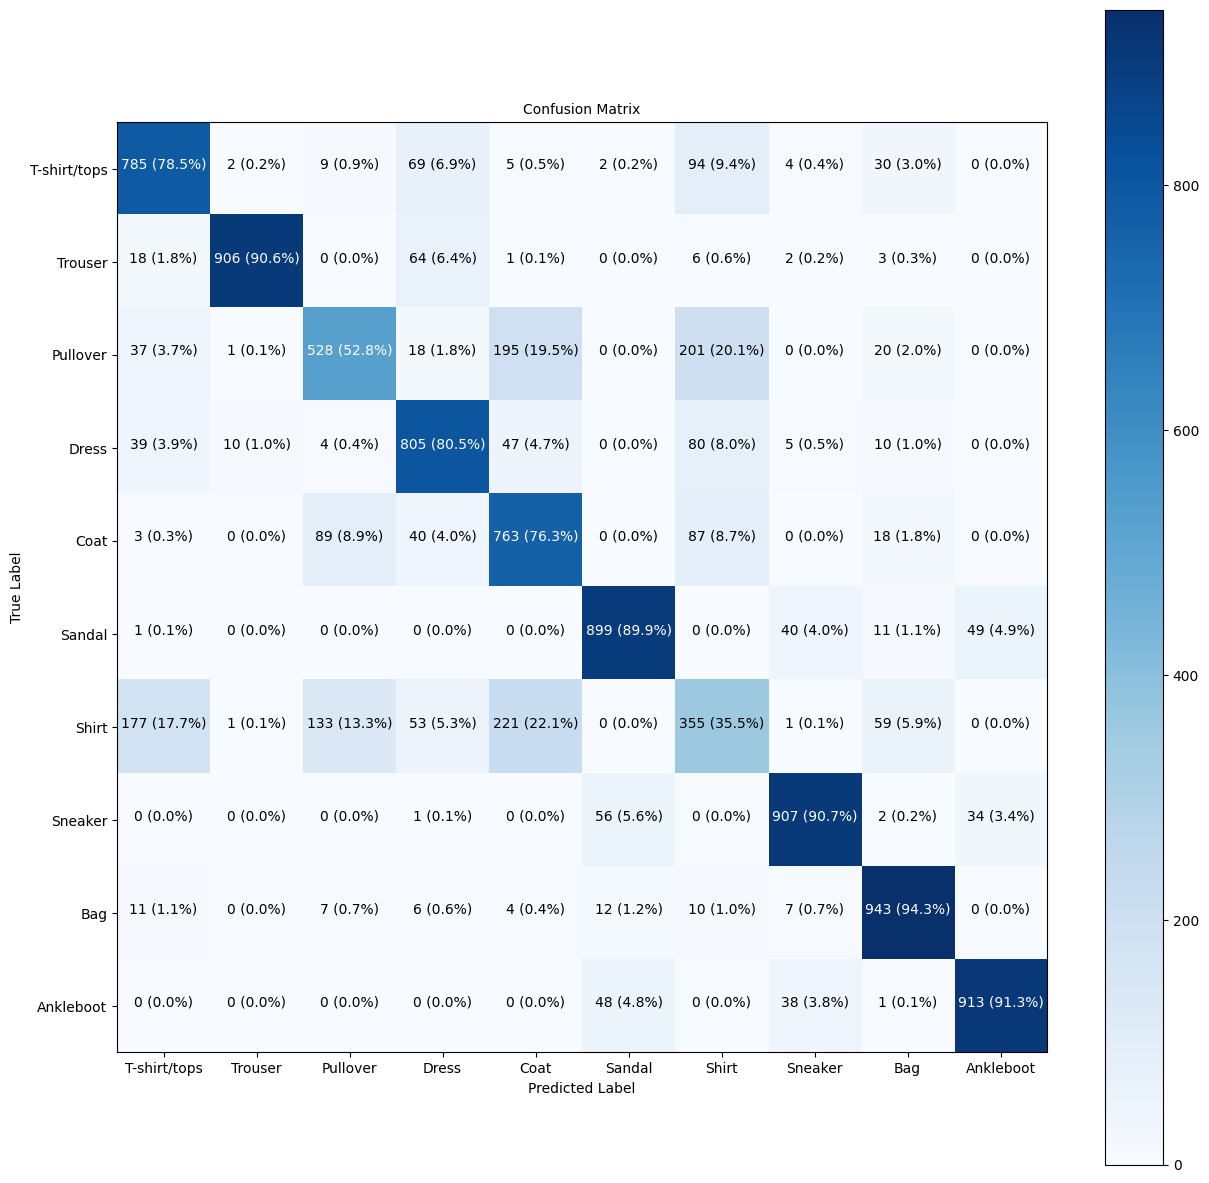

In [82]:
# Make a prettier confusion matrix

make_confusion_metrics(
    y_true=test_labels,
    y_pred=y_preds,
    classes=class_names,
    figsize=(15, 15),
    text_size=10
)

🔑 **Note** Often working with the images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and input, output of the models.

How about we create function for:
  * Plot a random image.
  * Make a prediction on said image.
  * Label the plot with the truth label & the predicted label.

In [83]:
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label
  """

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))  # model means parameter passes and 1 means 1 image passed
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color) # set the color to green or red if the predictions is right or wrong


1/1 [==============================] - 0s 40ms/step


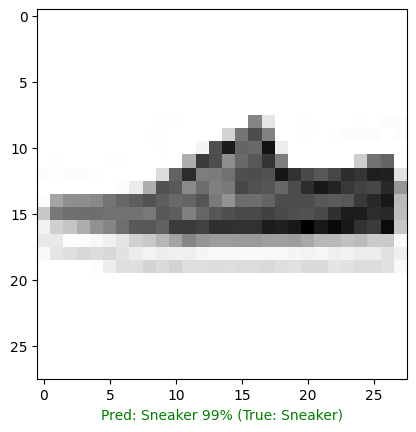

In [86]:
# Check out a random image as well as its prediction
plot_random_image(model=model_10, images=test_data_norm, true_labels=test_labels, classes=class_names) # always make predictions on the same kind of data

#What patterns is our model learning?

In [87]:
# Find the layers of our most recent model

model_10.layers

In [89]:
# Extract a particular layer

model_10.layers[1]

In [90]:
# Get the patterns of a layer in our network

weights, biases = model_10.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.9660875 ,  0.00730347, -0.87022585, -0.65114284],
        [ 0.8326885 , -0.07513236, -1.3652413 , -0.36523208],
        [ 1.4587195 , -0.05461807, -1.1803347 , -0.77520996],
        ...,
        [ 0.09664007,  0.08172353, -0.09005152,  0.5141843 ],
        [ 0.00307606, -0.03218869, -0.46778542,  1.0912768 ],
        [-0.06057351, -0.06066523, -0.76168907,  0.661788  ]],
       dtype=float32),
 (784, 4))

In [91]:
model_10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 3140      
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Now let's check out the bias vector

In [92]:
# Bias and biases shapes

biases, biases.shape  # Every hidden layers in our neural networks it has one bias vector

(array([ 1.2732733 , -0.03316861,  2.13826   ,  0.29709485], dtype=float32),
 (4,))

#Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

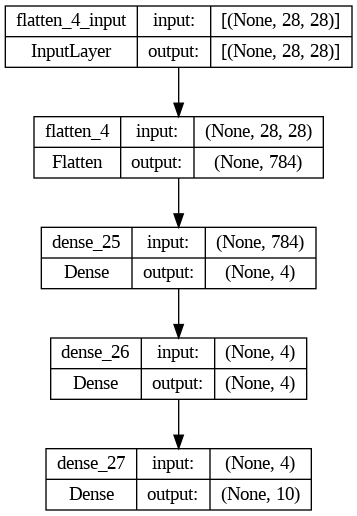

In [93]:
# Let's checkout another way of viewing our models.

from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer

plot_model(model_10, show_shapes=True)